In [128]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import seaborn as sns 


pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [125]:
df = pd.read_csv('../data/updated_housing_data.csv')


In [126]:
new_df = df #[['price', 'waterfront', 'lat', 'long', 'City']]
new_df.waterfront.replace(np.nan, 0, inplace = True)
new_df.head(2)

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,basement_ratio,sqft_living15_ratio,sqft_lot15_ratio,Latitude,Longitude,City,yrs_since_renovation,city_algona,city_auburn,city_baring,city_beaux arts,city_bellevue,city_black diamond,city_bothell,city_burien,city_carnation,city_clyde hill,city_covington,city_des moines,city_duvall,city_enumclaw,city_fall city,city_federal way,city_hunts point,city_issaquah,city_kenmore,city_kent,city_kirkland,city_lake forest park,city_maple valley,city_medina,city_mercer island,city_milton,city_newcastle,city_normandy park,city_north bend,city_pacific,city_preston,city_ravensdale,city_redmond,city_renton,city_sammamish,city_seatac,city_seattle,city_shoreline,city_skykomish,city_snoqualmie,city_snoqualmie pass,city_tukwila,city_vashon,city_woodinville,city_yarrow point
0,0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0.000,0.881,1.000,47.511234,-122.256775,seattle,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0.156,1.521,0.948,47.721025,-122.319113,seattle,64.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [121]:
def get_waterfront(df): 
    '''This function will create a value for each row that corresponds to its distance from the water (0-1)'''
    unique_cities = df.City.unique() 
    new_df = pd.DataFrame()
    for city in tqdm(unique_cities): 
        city_df= df[df.City == city].sort_values(by = ['waterfront', 'lat'], ascending = False).reset_index(drop = True)
        has_waterfront = city_df[city_df.waterfront == 1]
        non_waterfront= city_df[city_df.waterfront != 1].reset_index(drop = True)
        if len(has_waterfront) == 0: 
            city_df['waterfrontness'] = city_df.waterfront.map(lambda x: 1)
            new_df = new_df.append(city_df, ignore_index = True)
            continue 
        has_waterfront['waterfrontness'] = has_waterfront.waterfront.map(lambda x: 0)
        lat_min = city_df.iloc[city_df.lat.idxmin()]
        lat_max = city_df.iloc[city_df.lat.idxmax()]
        lat_mean = city_df.lat.mean()
        
        long_min = city_df.iloc[city_df.long.idxmin()]
        long_max = city_df.iloc[city_df.long.idxmax()]
        long_mean = city_df.long.mean()
        lat_array = np.array([lat_min.lat, lat_max.lat, lat_mean])
        long_array = np.array([long_min.long, long_max.long, long_mean])
        water_values = [] 
        
        for i in range(len(non_waterfront)): 
            row = non_waterfront.iloc[i]
            lat = row.lat 
            difference = abs(lat_array - lat )
            water_values.append(np.min(difference[np.nonzero(difference)]))
        non_waterfront['waterfrontness'] = water_values
        new_df = new_df.append(non_waterfront, ignore_index = True)
        new_df = new_df.append(has_waterfront, ignore_index = True)
    
    return new_df
            
        

tester = get_waterfront(new_df)

  0%|          | 0/45 [00:00<?, ?it/s]/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 45/45 [00:06<00:00,  6.54it/s]


In [127]:
#tester.to_csv('../data/updated_housing_data.csv', index = False)

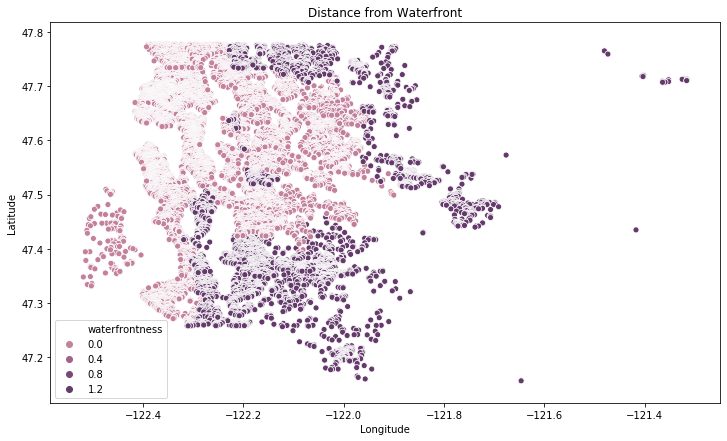

In [149]:
def create_waterfront_scatter(df): 
    '''This functions will create a scatter plot displaying the changes in prices based on distance from the
    waterfront'''
    fig, ax = plt.subplots(figsize = (12,7))
    cmap = sns.cubehelix_palette(dark=.3, light=.6, as_cmap=True)

    sns.scatterplot(x = 'long', y = 'lat', data = tester, hue = 'waterfrontness', ax = ax, palette = cmap)
    ax.set_title('Distance from Waterfront')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
create_waterfront_scatter(tester)